# HOW TO PLOT AN INTERSECTION BETWEEN A SURFACE AND A PLANE

Let us start from a simple curve: 

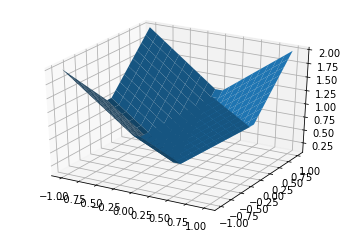

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1, 1, 20)
Y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(X, Y)
Z = abs(X) + abs(Y)


fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z)
plt.show()

Now let us try to add a simple plane, like z = 1

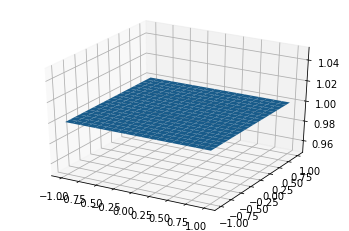

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1, 1, 20)
Y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(X, Y)
Z = X/X + Y/Y - 1 


fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z)
plt.show()

Now, let us try to plot both in the same figure:

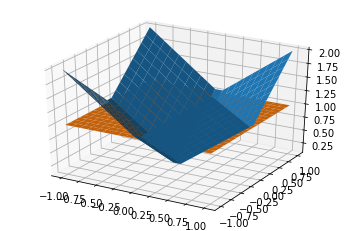

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1, 1, 20)
Y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(X, Y)
F = abs(X) + abs(Y)
G = X/X + Y/Y - 1

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, F)
surf2 = ax.plot_surface(X, Y, G)
plt.show()

The figure is not very clear, let us see if it gets clearer if I use a wireframe:

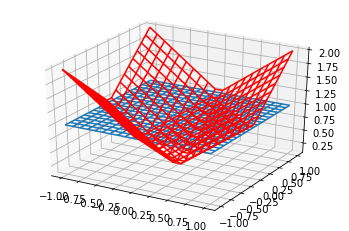

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1, 1, 20)
Y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(X, Y)
F = abs(X) + abs(Y)
G = X/X + Y/Y - 1

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_wireframe(X, Y, F, color="red")
surf2 = ax.plot_wireframe(X, Y, G)
plt.show()

It is not a lot better. Let us see if it is clearer with a different point of view: 

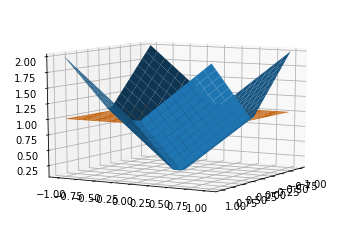

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1, 1, 20)
Y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(X, Y)
F = abs(X) + abs(Y)
G = X/X + Y/Y - 1

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(elev=10., azim=30)
surf = ax.plot_surface(X, Y, F)
surf2 = ax.plot_surface(X, Y, G)
plt.show()

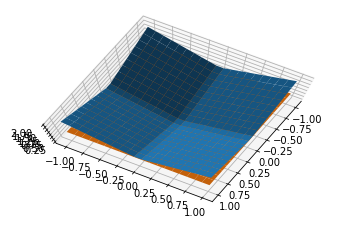

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1, 1, 20)
Y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(X, Y)
F = abs(X) + abs(Y)
G = X/X + Y/Y - 1

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(elev=80., azim=30)
surf = ax.plot_surface(X, Y, F)
surf2 = ax.plot_surface(X, Y, G)
plt.show()

Mmmm this is somewhat disappointing, I will try to investigate later if there is an easy way to show the plane intersecting a surface. 
For now I would like to see how it is possible to establish the "intersection curve", so that we could potentially create a new solid out of this and also evaluate the volume of this solid using integrals. 

In order to figure out the curve I should set F = G. 
Since G = 1, the intersection curve is simply abs(Y) = 1 - abs(X) 

In [13]:
X = np.linspace(-1, 1, 20)
Y = 1 - abs(X)
print(Y)

[0.         0.10526316 0.21052632 0.31578947 0.42105263 0.52631579
 0.63157895 0.73684211 0.84210526 0.94736842 0.94736842 0.84210526
 0.73684211 0.63157895 0.52631579 0.42105263 0.31578947 0.21052632
 0.10526316 0.        ]


This is the result for only the positive Y, we will have to extend this to get the negative points.
Let us try this. 

In [7]:
X = np.linspace(-1, 1, 20)
Y = 1 - abs(X)
x = np.linspace(-1,1,20)
y = abs(x) - 1
x = np.append(x,X)
y = np.append(y,Y)
print(y)

[ 0.         -0.10526316 -0.21052632 -0.31578947 -0.42105263 -0.52631579
 -0.63157895 -0.73684211 -0.84210526 -0.94736842 -0.94736842 -0.84210526
 -0.73684211 -0.63157895 -0.52631579 -0.42105263 -0.31578947 -0.21052632
 -0.10526316  0.          0.          0.10526316  0.21052632  0.31578947
  0.42105263  0.52631579  0.63157895  0.73684211  0.84210526  0.94736842
  0.94736842  0.84210526  0.73684211  0.63157895  0.52631579  0.42105263
  0.31578947  0.21052632  0.10526316  0.        ]


Let us try if this works:

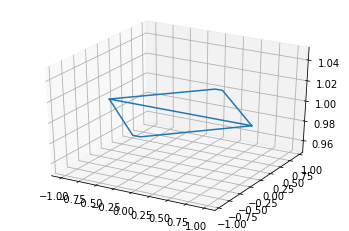

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1, 1, 20)
Y = 1 - abs(X)
x = np.linspace(-1,1,20)
y = abs(x) - 1
x = np.append(x,X)
y = np.append(y,Y)
z = abs(x) + abs(y)

fig = plt.figure()
ax = fig.gca(projection='3d')
curve = ax.plot(x,y,z)
plt.show()

Almost there, but I think we have an error, since the points in x have a discontinuity. 
We can fix this by reversing X using np.flip()

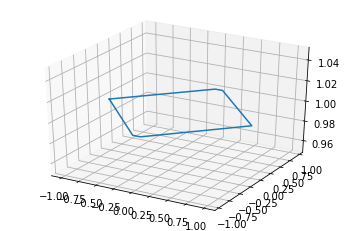

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1, 1, 20)
Y = 1 - abs(X)
x = np.linspace(-1,1,20)
y = abs(x) - 1
x = np.append(x,np.flip(X))
y = np.append(y,Y)
z = abs(x) + abs(y)

fig = plt.figure()
ax = fig.gca(projection='3d')
curve = ax.plot(x,y,z)
plt.show()

Let us see now if we can plot the intersection on top of the surface:

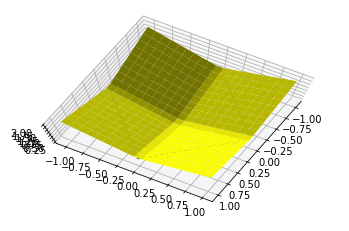

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1, 1, 20)
Y = 1 - abs(X)
x = np.linspace(-1,1,20)
y = abs(x) - 1
x = np.append(x,np.flip(X))
y = np.append(y,Y)
z = abs(x) + abs(y)
Y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(X, Y)
Z = abs(X) + abs(Y)



fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(elev=80., azim=30)
curve = ax.plot(x,y,z)
surf = ax.plot_surface(X, Y, Z, color="yellow")
plt.show()

The curve can barely be seen and I had to tweak a few times: it disappears completely if the surface is plotted before the curve and it can only be seen from above, but I think this plot shows that the concept is sound. 
Now I will need to find a way to set the curve as "boundary" for my meshgrid coordinates. 